# Explore the data

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../hand_made_stuff')
from handmadestuff import fit_predict_report
import statsmodels.formula.api as sm

# Importing data
loan_df = pd.read_csv('data/loan.csv')

# Dropping rows containing NaN values
loan_df = loan_df.dropna().iloc[:, 1:]

# Display how the data looks
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


# Preprocess the data

In [2]:
# Splitting the dataset into the source and the target values
X = loan_df.iloc[:, :11].values
y = loan_df.iloc[:, -1].values

In [3]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoding the source values
labelencoder_X = LabelEncoder()
categorical_sources = [0, 1, 2, 3, 4, 10]
for i in categorical_sources:
    X[:, i] = labelencoder_X.fit_transform(X[:, i])
    
# Encoding the target values (N, Y => 0, 1)
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [4]:
# Splitting the source values into the categorical and the continuous variables
X_1 = X[:, categorical_sources]
X_2 = X[:, [item for item in list(range(len(X[0]))) if item not in categorical_sources]]

In [5]:
# Hot encoding the categorical values

# X_1 is a numpy array, which shape is (480, 6).
# Second and fifth columns are the only that, contain values higher than 1
onehotencoder = OneHotEncoder()
X_1_encoded = onehotencoder.fit_transform(X_1[:, [2, 5]]).toarray()[:, 1:6]

# Columns [0, 1, 3, 4] contain only 0 and 1 values, thus not needed to be hot encoded
X_1_not_encoded = X_1[:, [0, 1, 3, 4]]

# Concatenating X_1_encoded with X_1_not_encoded to obtain X_1 with hot encoded values
X_1 = np.concatenate((X_1_not_encoded, X_1_encoded), axis = 1).astype('int')
# Concatenating X_1 and X_2 to obtain X
X = np.concatenate((X_1, X_2.astype(int)), axis = 1)

# Displaying the data

In [12]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

In [13]:
# PCA Projection to 3D
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_scaled_decomposed = pca.fit_transform(X_scaled)

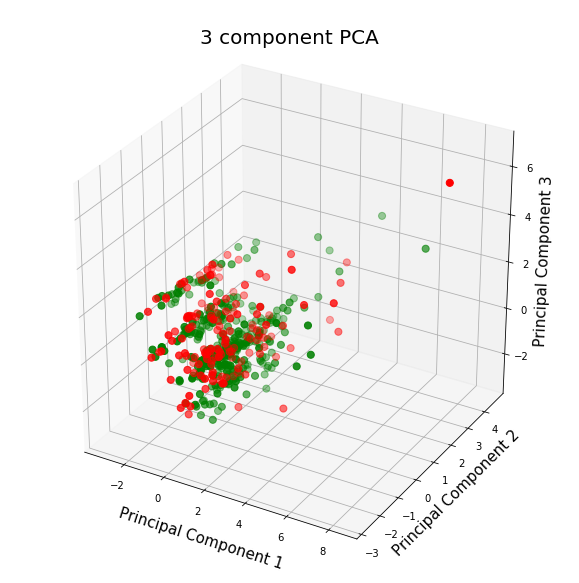

In [14]:
# Visualize 3D Projection
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

targets = [0, 1]
colors = ['r', 'g']
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

for i,j in enumerate(np.unique(y)):
    ax.scatter(X_scaled_decomposed[y == j, 0], 
               X_scaled_decomposed[y == j, 1],
               X_scaled_decomposed[y == j, 2],
               c = ListedColormap(('red', 'green'))(i), s = 50)
ax.set_xlabel('\nPrincipal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('\n3 component PCA\n', fontsize = 20)
ax.grid()

# Training the models and predicting test set results

## Original model

In [19]:
# Scaling the data
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

In [23]:
# Splitting the dataset into the train and the test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2,
                                                    random_state = 0)

In [24]:
fit_predict_report(loan_df, 'knn', X_train, y_train, X_test, y_test, n_neighbors = 10)

Classificator used:
 knn


Confusion matrix: 

 [[ 8 27]
 [ 0 61]] 


Classification report:

              precision    recall  f1-score   support

          0       1.00      0.23      0.37        35
          1       0.69      1.00      0.82        61

avg / total       0.81      0.72      0.66        96



In [25]:
fit_predict_report(loan_df, 'svc', X_train, y_train, X_test, y_test)

Classificator used:
 svc


Confusion matrix: 

 [[12 23]
 [ 0 61]] 


Classification report:

              precision    recall  f1-score   support

          0       1.00      0.34      0.51        35
          1       0.73      1.00      0.84        61

avg / total       0.83      0.76      0.72        96



In [26]:
fit_predict_report(loan_df, 'lr', X_train, y_train, X_test, y_test)

Classificator used:
 lr


Confusion matrix: 

 [[12 23]
 [ 1 60]] 


Classification report:

              precision    recall  f1-score   support

          0       0.92      0.34      0.50        35
          1       0.72      0.98      0.83        61

avg / total       0.80      0.75      0.71        96

